<a href="https://colab.research.google.com/github/anil6994/Network-Intrution/blob/master/Network_Intrution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import os
os.chdir('/drive/My Drive/deep learning/Hackathon_main/Network_Intrution_Detection')


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set_style('darkgrid')
import time

## Importing datset 

In [0]:
train =pd.read_csv('Network_Intrusion_Train_data.csv')
test = pd.read_csv('Network_Intrusion_Test_data.csv')

In [5]:
# shape of train dataset , shape of test dataset
train.shape,test.shape

((25192, 42), (22544, 41))

In [6]:
# train 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
duration                       25192 non-null int64
protocol_type                  25192 non-null object
service                        25192 non-null object
flag                           25192 non-null object
src_bytes                      25192 non-null int64
dst_bytes                      25192 non-null int64
land                           25192 non-null int64
wrong_fragment                 25192 non-null int64
urgent                         25192 non-null int64
hot                            25192 non-null int64
num_failed_logins              25192 non-null int64
logged_in                      25192 non-null int64
num_compromised                25192 non-null int64
root_shell                     25192 non-null int64
su_attempted                   25192 non-null int64
num_root                       25192 non-null int64
num_file_creations             25192 non-null int64
num_

In [7]:
# test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
duration                       22544 non-null int64
protocol_type                  22544 non-null object
service                        22544 non-null object
flag                           22544 non-null object
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_root                       22544 non-null int64
num_file_creations             22544 non-null int64
num_

# Descriptive Statistics 

In [8]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# checking the outerliers in test dataset
test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,0.002440,0.000266,0.114665,0.008738,0.001153,0.003549,0.0,0.000488,0.028433,79.028345,31.124379,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,0.049334,0.021060,8.041614,0.676842,0.048014,0.067829,0.0,0.022084,0.166211,128.539248,89.062532,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,123.250000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


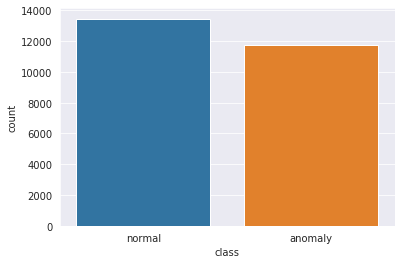

In [10]:
sns.countplot(train['class'])

In [11]:
train['num_outbound_cmds'].describe()
test['num_outbound_cmds'].describe()
print(train['num_outbound_cmds'].describe(),test['num_outbound_cmds'].describe())


count    25192.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_outbound_cmds, dtype: float64 count    22544.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_outbound_cmds, dtype: float64


In [0]:
train.drop('num_outbound_cmds',axis = 1,inplace = True)
test.drop('num_outbound_cmds',axis = 1,inplace = True)


# Handle categorical variables

In [0]:
train_a =train.select_dtypes(include=['object']).columns
test_a =test.select_dtypes(include=['object']).columns


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat = train.select_dtypes(include=['object'])

train_cat1=cat.apply(le.fit_transform)

train_cat=train_cat1.drop(['class'],axis = 1)
train_d1=train_cat
train_d1.head(2)

,protocol_type,service,flag
0,1,19,9
1,2,41,9


In [15]:
train_d11 =pd.concat([train_d1,train['class']],axis = 1)
train_d11.head(2)

,protocol_type,service,flag,class
0,1,19,9,normal
1,2,41,9,normal


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat = test.select_dtypes(include=['object'])

test_cat1=cat.apply(le.fit_transform)

test_cat1.head(2)

,protocol_type,service,flag
0,1,45,1
1,1,45,1


# Handle numerical variables

In [0]:
train_col_int =train.select_dtypes(include=['int64','float64']).columns
test_col_int =train.select_dtypes(include=['int64','float64']).columns



In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

cols = train.select_dtypes(include=['float64','int64'])
sc_train = sc.fit_transform(cols)
sc_train

array([[-0.11355066, -0.00988885, -0.03930979, ..., -0.62736475,
        -0.22166806, -0.37428075],
       [-0.11355066, -0.01003196, -0.03930979, ..., -0.62736475,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075],
       ...,
       [-0.11355066, -0.01009252, -0.03930979, ..., -0.62736475,
         2.88429591,  2.77704096],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.01009252, -0.03930979, ...,  1.61445359,
        -0.38513984, -0.37428075]])

In [19]:
train_d2=pd.DataFrame(sc_train,columns=train_col_int)
train_d2.head(2)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.009889,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.720244,-0.354628,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.349282,-0.373886,-0.328634,-0.813985,-0.779157,-0.280673,0.07312,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,-0.010032,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,-0.039377,-0.027665,-0.021724,-0.027808,-0.018905,-0.043917,0.0,-0.09599,-0.624317,-0.368427,-0.640142,-0.633978,-0.372186,-0.373098,-1.320567,0.490836,-0.373886,0.732059,-1.030895,-1.157831,2.764403,2.37562,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

cols = test.select_dtypes(include=['float64','int64'])
sc_test = sc.fit_transform(cols)
sc_test

array([[-0.15553409, -0.02198811, -0.09689597, ..., -0.3527496 ,
         1.97979091,  1.9291162 ],
       [-0.15553409, -0.02198811, -0.09689597, ..., -0.3527496 ,
         1.97979091,  1.9291162 ],
       [-0.15411277,  0.0054731 , -0.09689597, ..., -0.3527496 ,
        -0.60271888, -0.56548308],
       ...,
       [-0.15553409,  0.09337309,  0.29492588, ..., -0.3527496 ,
        -0.4219432 , -0.39086113],
       [-0.15553409, -0.02189927, -0.0949166 , ..., -0.3527496 ,
        -0.60271888, -0.56548308],
       [-0.15553409, -0.02198811, -0.09689597, ..., -0.3527496 ,
         0.53358543,  1.9291162 ]])

In [21]:
test_d2=pd.DataFrame(sc_test,columns=test_col_int)
test_d2.head(2)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,1.166764,-0.237191,-0.348468,-0.34739,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650093,-1.169697,-1.305370,-0.13837,-0.431856,-0.22998,-0.358118,-0.35275,1.979791,1.929116
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,0.443234,-0.338246,-0.348468,-0.34739,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650093,-1.250212,-1.397181,-0.13837,-0.431856,-0.22998,-0.358118,-0.35275,1.979791,1.929116


In [0]:
train_final_data = pd.concat([train_d11,train_d2],axis = 1)

In [0]:
test_final_data = pd.concat([test_cat1,test_d2],axis = 1)


In [24]:
train_final_data.shape,test_final_data.shape

((25192, 41), (22544, 40))

In [0]:
x = train_final_data[['protocol_type', 'service', 'flag', 'duration', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']]

In [0]:
y = train_final_data['class']

In [27]:
x.shape

(25192, 40)

In [28]:
y.shape

(25192,)

In [0]:
# train_test_split

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,random_state = 101)

# Feature Selection
-since we have many variables we have to check the importance of variables

In [0]:
from sklearn.ensemble import RandomForestClassifier  


In [32]:
model =RandomForestClassifier()
model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
score = np.round(model.feature_importances_,3)

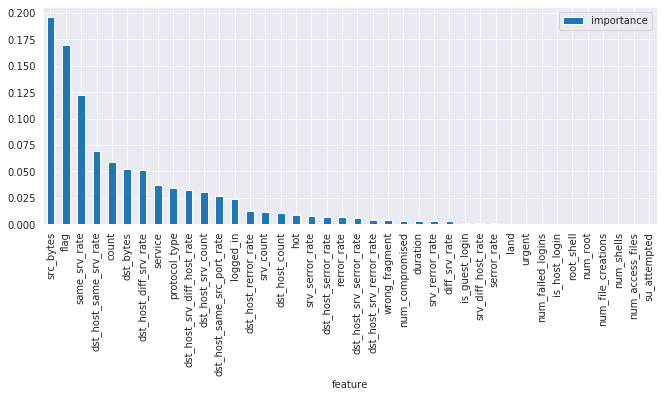

In [34]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [35]:
X_train.columns

Index(['protocol_type', 'service', 'flag', 'duration', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [0]:
x1 = train_final_data[['protocol_type', 'service', 'flag', 'duration', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']]

In [0]:
y1 =train_final_data['class']


In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x1,y1,test_size = 0.25,random_state = 101)


# Fitting the Model

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier  
 


In [40]:
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
GAUS_Classifier = GaussianNB()
GAUS_Classifier.fit(X_train, Y_train);

# Train Decision Tree Model
DTC_Classifier = DecisionTreeClassifier()
DTC_Classifier.fit(X_train, Y_train);
            

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier()
KNN_Classifier.fit(X_train, Y_train); 

# Train Support Vector Machine 
SVC_Classifier=SVC()
SVC_Classifier.fit(X_train,Y_train)

#RFC classifier
RFC_Classifier = RandomForestClassifier()
RFC_Classifier.fit(X_train,Y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions_train_LGR = LGR_Classifier.predict(X_train)
predictions_test_LGR = LGR_Classifier.predict(X_test)

predictions_train_GAUS= GAUS_Classifier.predict(X_train)
predictions_test_GAUS = GAUS_Classifier.predict(X_test)

predictions_train_DTC = DTC_Classifier.predict(X_train)
predictions_test_DTC = DTC_Classifier.predict(X_test)

predictions_train_KNN = KNN_Classifier.predict(X_train)
predictions_test_KNN = KNN_Classifier.predict(X_test)


predictions_train_SVC = SVC_Classifier.predict(X_train)
predictions_test_SVC = SVC_Classifier.predict(X_test)

predictions_train_RFC = RFC_Classifier.predict(X_train)
predictions_test_RFC = RFC_Classifier.predict(X_test)


In [0]:

from sklearn.metrics import roc_curve,auc,confusion_matrix, \
classification_report,accuracy_score

In [43]:
print(classification_report(Y_train,predictions_train_LGR))
print("Accuracy:",accuracy_score(Y_train,predictions_train_LGR))

print(classification_report(Y_test,predictions_test_LGR))
print("Accuracy:",accuracy_score(Y_test,predictions_test_LGR))

              precision    recall  f1-score   support

     anomaly       0.96      0.94      0.95      8824
      normal       0.95      0.97      0.96     10070

    accuracy                           0.95     18894
   macro avg       0.96      0.95      0.95     18894
weighted avg       0.95      0.95      0.95     18894

Accuracy: 0.9546946120461522
              precision    recall  f1-score   support

     anomaly       0.96      0.93      0.95      2919
      normal       0.94      0.97      0.95      3379

    accuracy                           0.95      6298
   macro avg       0.95      0.95      0.95      6298
weighted avg       0.95      0.95      0.95      6298

Accuracy: 0.9507780247697681


In [44]:
print(classification_report(Y_train,predictions_train_GAUS))
print("Accuracy:",accuracy_score(Y_train,predictions_train_GAUS))

print(classification_report(Y_test,predictions_test_GAUS))
print("Accuracy:",accuracy_score(Y_test,predictions_test_GAUS))

              precision    recall  f1-score   support

     anomaly       0.89      0.87      0.88      8824
      normal       0.89      0.90      0.90     10070

    accuracy                           0.89     18894
   macro avg       0.89      0.89      0.89     18894
weighted avg       0.89      0.89      0.89     18894

Accuracy: 0.8893828728696941
              precision    recall  f1-score   support

     anomaly       0.88      0.88      0.88      2919
      normal       0.90      0.90      0.90      3379

    accuracy                           0.89      6298
   macro avg       0.89      0.89      0.89      6298
weighted avg       0.89      0.89      0.89      6298

Accuracy: 0.8896475071451254


In [45]:
print(classification_report(Y_train,predictions_train_DTC))
print("Accuracy:",accuracy_score(Y_train,predictions_train_DTC))

print(classification_report(Y_test,predictions_test_DTC))
print("Accuracy:",accuracy_score(Y_test,predictions_test_DTC))

              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      8824
      normal       1.00      1.00      1.00     10070

    accuracy                           1.00     18894
   macro avg       1.00      1.00      1.00     18894
weighted avg       1.00      1.00      1.00     18894

Accuracy: 1.0
              precision    recall  f1-score   support

     anomaly       1.00      0.99      1.00      2919
      normal       1.00      1.00      1.00      3379

    accuracy                           1.00      6298
   macro avg       1.00      1.00      1.00      6298
weighted avg       1.00      1.00      1.00      6298

Accuracy: 0.9957129247380121


In [46]:
print(classification_report(Y_train,predictions_train_KNN))
print("Accuracy:",accuracy_score(Y_train,predictions_train_KNN))

print(classification_report(Y_test,predictions_test_KNN))
print("Accuracy:",accuracy_score(Y_test,predictions_test_KNN))

              precision    recall  f1-score   support

     anomaly       1.00      0.99      0.99      8824
      normal       0.99      1.00      1.00     10070

    accuracy                           0.99     18894
   macro avg       1.00      0.99      0.99     18894
weighted avg       0.99      0.99      0.99     18894

Accuracy: 0.994919021911718
              precision    recall  f1-score   support

     anomaly       1.00      0.98      0.99      2919
      normal       0.99      1.00      0.99      3379

    accuracy                           0.99      6298
   macro avg       0.99      0.99      0.99      6298
weighted avg       0.99      0.99      0.99      6298

Accuracy: 0.9911082883455065


In [47]:
print(classification_report(Y_train,predictions_train_SVC))
print("Accuracy:",accuracy_score(Y_train,predictions_train_SVC))

print(classification_report(Y_test,predictions_test_SVC))
print("Accuracy:",accuracy_score(Y_test,predictions_test_SVC))

              precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      8824
      normal       0.99      0.99      0.99     10070

    accuracy                           0.99     18894
   macro avg       0.99      0.99      0.99     18894
weighted avg       0.99      0.99      0.99     18894

Accuracy: 0.9932253625489573
              precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      2919
      normal       0.99      0.99      0.99      3379

    accuracy                           0.99      6298
   macro avg       0.99      0.99      0.99      6298
weighted avg       0.99      0.99      0.99      6298

Accuracy: 0.9882502381708479


In [48]:
print(classification_report(Y_train,predictions_train_RFC))
print("Accuracy:",accuracy_score(Y_train,predictions_train_RFC))

print(classification_report(Y_test,predictions_test_RFC))
print("Accuracy:",accuracy_score(Y_test,predictions_test_RFC))

              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      8824
      normal       1.00      1.00      1.00     10070

    accuracy                           1.00     18894
   macro avg       1.00      1.00      1.00     18894
weighted avg       1.00      1.00      1.00     18894

Accuracy: 0.9998412194347411
              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2919
      normal       1.00      1.00      1.00      3379

    accuracy                           1.00      6298
   macro avg       1.00      1.00      1.00      6298
weighted avg       1.00      1.00      1.00      6298

Accuracy: 0.9971419498253413


# cross_validation

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
# X_train,Y_train

In [51]:
score_LGR = cross_val_score(LGR_Classifier, X_train, Y_train).mean()
score_GAUS = cross_val_score(GAUS_Classifier, X_train, Y_train).mean()
score_DTC = cross_val_score(DTC_Classifier, X_train, Y_train).mean()
score_KNN = cross_val_score(KNN_Classifier, X_train, Y_train).mean()
score_SVC = cross_val_score(SVC_Classifier, X_train, Y_train).mean()
score_RFC = cross_val_score(RFC_Classifier, X_train, Y_train).mean()


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in 

In [52]:
print(score_LGR*100)
print(score_GAUS*100)
print(score_DTC*100)
print(score_KNN*100)
print(score_SVC*100)
print(score_RFC*100)




95.35832145107719
89.15523847330144
99.43368011970927
99.09495160278846
98.93616515316565
99.61893335997888


In [0]:
# X_test,Y_test

In [54]:
score_LGR_test = cross_val_score(LGR_Classifier, X_test, Y_test).mean()
score_GAUS_test = cross_val_score(GAUS_Classifier, X_test, Y_test).mean()
score_DTC_test = cross_val_score(DTC_Classifier, X_test, Y_test).mean()
score_KNN_test = cross_val_score(KNN_Classifier, X_test, Y_test).mean()
score_SVC_test = cross_val_score(SVC_Classifier, X_test, Y_test).mean()
score_RFC_test = cross_val_score(RFC_Classifier, X_test, Y_test).mean()




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in 

In [55]:
print(score_LGR_test*100)
print(score_GAUS_test*100)
print(score_DTC_test*100)
print(score_KNN_test*100)
print(score_SVC_test*100)
print(score_RFC_test*100)




95.45888820829269
83.20055657644986
98.69797409197125
98.47566112358871
97.71349924756308
99.31723345205955


In [0]:
a = ['LGR','GAUS','DTC','KNN','SVC','RFC']
b = [95.45,83.20,98.76,98.47,97.71,99.17]

In [57]:
DATA = {'ML':a,'ACC':b}
pd.DataFrame(DATA)

,ML,ACC
0,LGR,95.45
1,GAUS,83.20
2,DTC,98.76
3,KNN,98.47
4,SVC,97.71
5,RFC,99.17


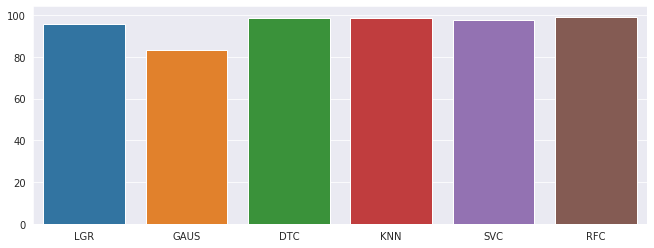

In [58]:
sns.barplot(x = 'ML',y= 'ACC',data = DATA)

#                                       Random forest - 99.17

## TEST DATA SET PREDICITION

In [0]:
test_df = test_final_data[['protocol_type', 'service', 'flag', 'duration', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']]

In [0]:
pred_LGR = LGR_Classifier.predict(test_df)
pred_GAUS = GAUS_Classifier.predict(test_df)
pred_DTC = DTC_Classifier.predict(test_df)
pred_KNN = KNN_Classifier.predict(test_df)
pred_RFC = RFC_Classifier.predict(test_df)




In [61]:
pred_LGR

array(['anomaly', 'anomaly', 'normal', ..., 'normal', 'normal', 'anomaly'],
      dtype=object)

In [62]:
pred_GAUS

array(['anomaly', 'anomaly', 'anomaly', ..., 'anomaly', 'anomaly',
       'anomaly'], dtype='<U7')

In [63]:
pred_DTC

array(['anomaly', 'anomaly', 'normal', ..., 'anomaly', 'normal', 'normal'],
      dtype=object)

In [64]:
pred_KNN

array(['anomaly', 'anomaly', 'normal', ..., 'anomaly', 'normal',
       'anomaly'], dtype=object)

In [65]:
pred_RFC

array(['anomaly', 'anomaly', 'normal', ..., 'anomaly', 'normal',
       'anomaly'], dtype=object)